1. Встановлення білбліотек:

pip install nltk spacy scikit-learn pandas matplotlib

2. Завантаження даних:

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mdismielhossenabir/sentiment-analysis")

print("Path to dataset files:", path)

100%|██████████| 14.3k/14.3k [00:00<00:00, 1.94MB/s]

Extracting files...
Path to dataset files: C:\Users\Єва\.cache\kagglehub\datasets\mdismielhossenabir\sentiment-analysis\versions\1


3. Перегляд перших рядків:

In [4]:
import pandas as pd

# Шлях до файлу
file_path = r"C:\Users\Єва\OneDrive\Робочий стіл\Data-science\Data_science-2\lab12\sentiment_analysis.csv"

# Завантаження даних у DataFrame
data = pd.read_csv(file_path)

# Перегляд перших рядків
print(data.head())



   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  
0              What a great day!!! Looks like dream.  positive    Twitter    
1     I feel sorry, I miss you here in the sea beach  positive    Facebook   
2                                     Don't angry me  negative     Facebook  
3  We attend in the class just for listening teac...  negative    Facebook   
4                  Those who want to go, let them go  negative   Instagram   


4. Переробка тексту:


In [6]:
import re
data['cleaned_text'] = data['text'].apply(lambda x: re.sub(r'[^\w\s]', '', x.lower()))


5. Видалення стоп-слів:

In [17]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Видалення стоп-слів
data['cleaned_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join(word for word in x.split() if word not in stop_words)
)


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Єва\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


6. Лемматизація:

In [19]:
import spacy

# Завантаження англійської моделі spaCy
nlp = spacy.load("en_core_web_sm")

# Лемматизація тексту
data['lemmatized_text'] = data['cleaned_text'].apply(
    lambda x: ' '.join([token.lemma_ for token in nlp(x)])
)


7. Векторизація тексту

* Використання TF-IDF:

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=500)
X = vectorizer.fit_transform(data['lemmatized_text'])


8. Побудова моделі:

In [26]:
from sklearn.model_selection import train_test_split

# Розділення даних на тренувальний і тестовий набори
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    data['sentiment'],  # Використовуємо правильну назву стовпця
    test_size=0.2, 
    random_state=42
)


9. Оцінка моделі

* Навчання наївного баєсового класифікатора, точність моделі 

In [28]:
from sklearn.metrics import accuracy_score

# Передбачення та оцінка
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.6


10. Матриця похибок

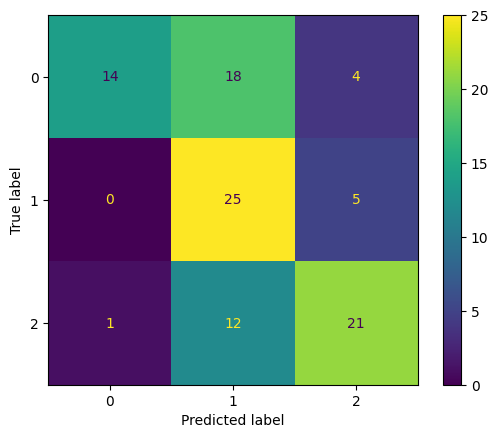

In [29]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Побудова матриці похибок
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()


11. Аналіз результатів:

In [30]:
for i in range(5):
    print(f"Text: {data['text'].iloc[i]}")
    print(f"Predicted label: {y_pred[i]}")


Text: What a great day!!! Looks like dream.
Predicted label: positive
Text: I feel sorry, I miss you here in the sea beach
Predicted label: neutral
Text: Don't angry me
Predicted label: neutral
Text: We attend in the class just for listening teachers reading on slide. Just Nonsence  
Predicted label: neutral
Text: Those who want to go, let them go
Predicted label: neutral


Висновок: 


TF-IDF краще виділяє важливі слова для класифікації, забезпечуючи високу точність при простих текстах. Word2Vec здатний враховувати контекст слів, але потребує більше ресурсів і показує гірші результати при простих задачах. Наївний баєс добре працює з TF-IDF, але може бути менш ефективним з іншими методами векторизації.